# **Quantum Algorithms**

## **Grover's Algorithm**

##### *Implementation*

Installation of necessary packages

In [1]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installation and importing of libraries

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

#### **Classical Algorithm**
First, we will show the classical search algorithm

We create a random list of numbers

In [3]:
myList = [5,4,6,9,1,2,3,7,8,0]

We want to find the secret number and that is why we create an oracle / black-box

In [4]:
def oracle(number):
    winningNumber = 8
    if number == winningNumber:
        response = True
    else:
        response = False
    return response

In order to find this number we will search the whole list which is O(n)

In [5]:
for index, number in enumerate(myList):
    if oracle(number) is True:
        print(f"winning number index: {index}")
        print(f"execution count: {index + 1}")
        break

winning number index: 8
execution count: 9


#### **Grover's Algorithm**

However, with Grover's Algorithm it can be done in O(sqrt(n))

In this example we will only have 4 states 00, 01, 10, 11 and the winning number will be 11 and in order to understand it when we measure it, we will flip it into - |11>

* Firstly, we apply h to both qubits.
* Secondly, we will implement the oracle.
* Finally, we will apply the reflection circuit in order to increase the prossibility of finding the winning state.

For the oracle, we apply the Z gate

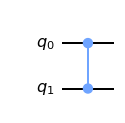

In [6]:
#Oracle Circuit (WinningNumber = 11)

oracleCircuit = QuantumCircuit(2, name='oracleCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

After that, we create the main circuit that has also bits, then we apply h and finally we append the oracle circuit.

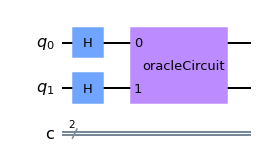

In [7]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

Later, we create the reflection circuit.

We can see that everything but the |00> has been changed and if we can change its phase then we will increase the possibilty of |11> as winning state.

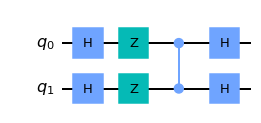

In [8]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

Finally, we append it to the main circuit.

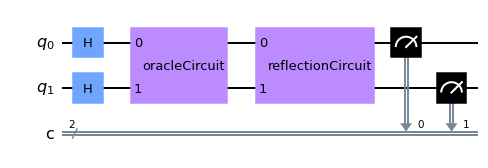

In [9]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

Here, we can run it in a simulator

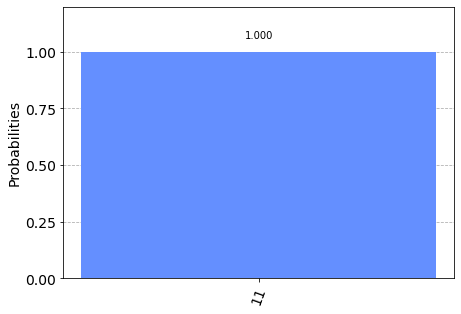

In [10]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit,backend=backend,shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])

### **An Application of this Algorithm**

We want to invite some guests and we want as many as possible but we have some constraints (e.g. some of them have a conflict and cannot be together). For this we will use qiskit-aqua.

In [11]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import PhaseOracle
from qiskit.algorithms import Grover, AmplificationProblem

%matplotlib inline

**1st attempt**

In [12]:
logicalExpressions = '((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)'

**2nd attempt**

For instance, (James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)

In [13]:
oracle = PhaseOracle('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)')
problem = AmplificationProblem(oracle=oracle, is_good_state=oracle.evaluate_bitstring)
backend = Aer.get_backend('qasm_simulator')
grover = Grover(quantum_instance=backend)
result = grover.amplify(problem)

In [14]:
print(result.circuit_results[0])

{'0011': 261, '0111': 258, '1101': 236, '1100': 269}


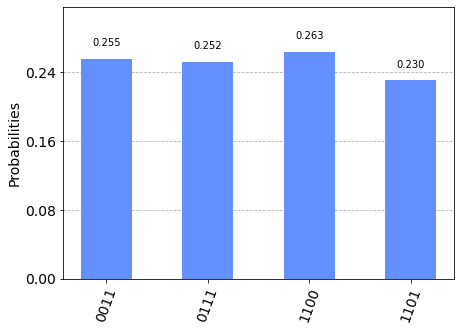

In [15]:
plot_histogram(result.circuit_results)

In [16]:
# Alphabetical order: James - Kirk - Lars - Rob
# 0101: James - Lars
# 0111: James - Kirk - Lars
# 1010: Kirk - Rob
# 1011: James - Kirk - Rob